# EDA for Lending Club Case Study

## Introduction
We have a company which is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

## Business Objective
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (Credit Loss) i.e borrowers who default cause the largest amount of loss to the lenders. The company wants to understand the driving factors behind loan default so that they can evaluate these parameters in the loan application and effectively decide if they can Approve or Reject loan

## Problem Statement
Whenever the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

We need to analyze the dataset provided by the company and perform an Exploratory Data Analysis to highlight the list of driving factors which influence the possibility of an applicant repay the loan or defaulting on it.




## About the Dataset
The company has provided complete loan data for all loans issued through the time period 2007 to 2011. The data is provided in the form of a CSV file (**loan.csv**). The company has also provided the data dictionary for the variables which are part of the historical data (**Data_Dictionary.csv**) 

### Data Specifications
The data has list of all the loans issued between 2007 and 2011. Some of the specifications are as follows:
- There are **111 columns** in the dataset.
- There are **39717 records** in the dataset. 
- The target variable here is the **loan_status** column.
- Loan_Status column is an unordered categorical variable with 3 different categories:
    - Fully Paid
    - Charged Off
    - Current
- Of the 3 categories, we are interested in **Fully Paid** and **Charged Off**

### Importing Python packages and loading the dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.display import display

sns.set()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

data = pd.read_csv("E:\\UpGrad\\git\\LendingClub\\loan\\loan.csv")

### Removal of records with loan status as *Current*
Loan_Status is our target variable. There are 3 categories of which **Current** is one. Since we are interested in Fully Paid and Charged off categories, lets remove the records which have the loan status as "Current
After removing the records, the total number of records in the dataset is now **38577**

In [56]:
data = data[data["loan_status"]!="Current"]
len(data)

38577

### Removal of columns which have *Zero Non-Null* values
A priliminary analysis for missing values resulted in fishing out 55 columns which have all their row values as Null or have Zero Non-Null values. Since there is no point in keeping these columns, we need to remove these columns all together

In [57]:
# Remove all the columns that have zero non-null values
filt = data.isnull().sum() != len(data)
data = data.loc[:,filt]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 56 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null object
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36191 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null object
loan_status                   38577 non-null object
pymnt_pl

### Handling the Null values for the rest of the columns

A quick check on the percent of missing values for the rest of the 56 columns yielded the below stats:
- **mths_since_last_record** has **93%** of its data as NA.
- **mths_since_last_delinq** has **65%** of its data as NA.
- **desc** has **32%** of its data as NA.
- **emp_title** has **6%** of its data as NA.
- **emp_length** has **3%** of its data as NA.
- **pub_rec_bankruptcie** has **2%** of its data as NA.
- **title,revol_util,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens** have between 0.1 and 0.3% of its values missing
- The rest of the columns have no missing values

Below is the action taken to handle the missing values in the above columns:
- **mths_since_last_record**: Since it has 93% missing data, we are removing this column.
- **mths_since_last_delinq**: Since it has 65% missing data, we are removing this column.
- **desc**: Since it has 32% missing data, we are removing this column. Also, another compelling reason to remove this is that desc doesnt yield any meaning insights unless being processed through NLP. 
- **emp_title**: Has 6% of missing data. This means we cannot remove the column. Also, we cannot delete the records as we will loose 6% of the data. Upon analyzing the column for its values, i found that it has close to 29k unique titles. This is close to 70% of the categorical data not yielding any useful category or insights. Hence, **we will delete this column.**
- **emp_length**: Has 3% of its data missing. This is substantial number of records to delete. emp_length has values between <1 and > 10. We can **impute the missing values with 0**, since 0 wouldn't signify anything i.e it neither distorts nor adds any new data.
- **pub_rec_bankruptcie**: Has 2% of its data missing. This is substantial number of records to delete. pub_rec_bankruptcies has only 3 unique values: 0, 1, 2. As per my observation, the data is completle skewed towards the value 0 - close to 94% of the data. Hence we can **impute the NaN values with the value 0**.
- **title,revol_util,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens**: Since their missinf values are between 0.1 and 0.3, we can afford to loose that much of data. Hence we can delete those records.

After removing all the NULL values, we end up with **52** columns and **38391** records.

In [58]:
# Code to remove the above columns.
round(data.isnull().sum()/len(data),3)*100
data = data.loc[:,~data.columns.isin(["desc","mths_since_last_record","mths_since_last_delinq"])]
data = data.loc[:,~data.columns.isin(["emp_title"])]

# Code to impute missing pub_rec_bankruptcies values with zero value
data["pub_rec_bankruptcies"][data["pub_rec_bankruptcies"].isnull()] = 0

# Code to impute missing emp_length with "0 years"
data["emp_length"][data["emp_length"].isnull()] = "0 years"

# Code to delete the NULL records from title,revol_util,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens columns
data = data[-(data["last_credit_pull_d"].isnull() | data["title"].isnull() | data["last_pymnt_d"].isnull() | data["tax_liens"].isnull() | data["revol_util"].isnull() | data["collections_12_mths_ex_med"].isnull() | data["chargeoff_within_12_mths"].isnull())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38391 entries, 0 to 39665
Data columns (total 52 columns):
id                            38391 non-null int64
member_id                     38391 non-null int64
loan_amnt                     38391 non-null int64
funded_amnt                   38391 non-null int64
funded_amnt_inv               38391 non-null float64
term                          38391 non-null object
int_rate                      38391 non-null object
installment                   38391 non-null float64
grade                         38391 non-null object
sub_grade                     38391 non-null object
emp_length                    38391 non-null object
home_ownership                38391 non-null object
annual_inc                    38391 non-null float64
verification_status           38391 non-null object
issue_d                       38391 non-null object
loan_status                   38391 non-null object
pymnt_plan                    38391 non-null object
url     

## The issue with duplicate values
Upon analysis for duplicate values, i found that for columns **collections_12_mths_ex_med, policy_code, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens, pymnt_plan, initial_list_status, application_type**, they have the same value across all the records. For example collections_12_mths_ex_med has all its values equal to 0 and policy_code has all its value equal to 1. It doesnt add any value to retain these columns and hence we will **remove these columns** from the dataset.

Drawing from the same logic, columns **delinq_2yrs, pub_rec, out_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, pub_rec_bankruptcies** have very high skewed data i.e one of its value dominates the rest of the other values. As per my below analysis, one of the value holds close to 90% or more than 90% of the total values. This will not yield any useful insights as the data is completely skewed. Since they dont add any value to our analysis, we can **remove these columns**.

After removing the above columns, we end up with **35** columns and **38391** records

### Analysis of the highly skewed columns

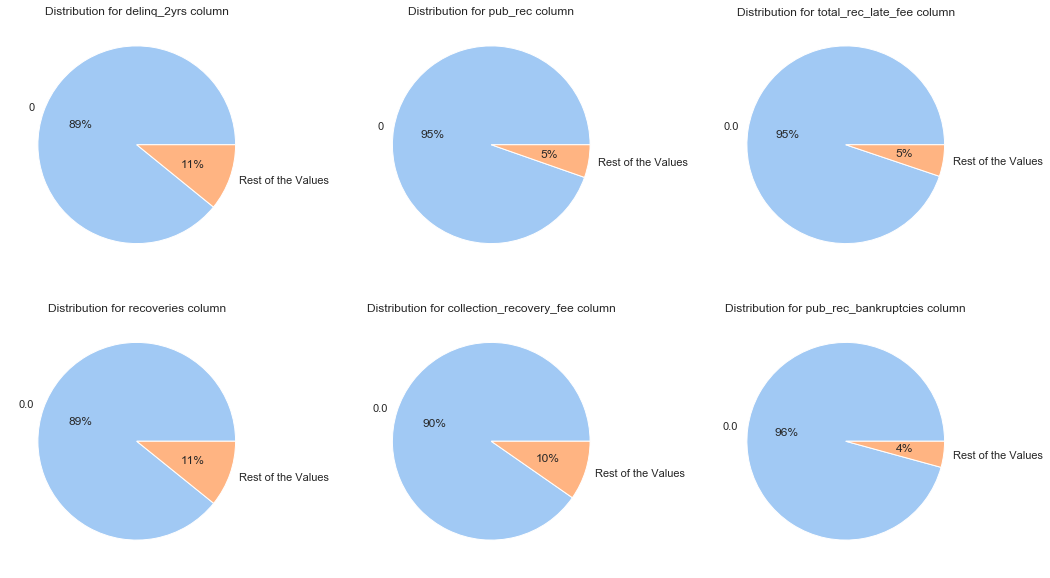

In [59]:
total = len(data)

# Function to create only 2 segments for pie chart: One for majority column and the other that contains rest of the values
def convert_dat_label(val):
    dat = list(val)
    dat.append(total-dat[0])
    label = list(val.keys())
    label.append("Rest of the Values")
    return dat, label

fig, axis = plt.subplots(2,3,figsize=(18, 10))
colors = sns.color_palette('pastel')[0:5]

dat_delinq, label_delinq = convert_dat_label(data["delinq_2yrs"].value_counts()[data["delinq_2yrs"].value_counts()>4000]) 
dat_pub_rec, label_pub_rec = convert_dat_label(data["pub_rec"].value_counts()[data["pub_rec"].value_counts()>2500]) 
dat_total_rec_late_fee, label_total_rec_late_fee = convert_dat_label(data["total_rec_late_fee"].value_counts()[data["total_rec_late_fee"].value_counts()>300]) 
dat_recoveries, label_recoveries = convert_dat_label(data["recoveries"].value_counts()[data["recoveries"].value_counts()>10]) 
dat_collection_recovery_fee, label_collection_recovery_fee = convert_dat_label(data["collection_recovery_fee"].value_counts()[data["collection_recovery_fee"].value_counts()>15]) 
dat_pub_rec_bankruptcies, label_pub_rec_bankruptcies = convert_dat_label(data["pub_rec_bankruptcies"].value_counts()[data["pub_rec_bankruptcies"].value_counts()>2000]) 

axis[0,0].pie(list(dat_delinq),labels=label_delinq,colors = colors, autopct='%.0f%%')
axis[0,1].pie(list(dat_pub_rec),labels=label_pub_rec,colors = colors, autopct='%.0f%%')
axis[0,2].pie(list(dat_total_rec_late_fee),labels=label_total_rec_late_fee,colors = colors, autopct='%.0f%%')
axis[1,0].pie(list(dat_recoveries),labels=label_recoveries,colors = colors, autopct='%.0f%%')
axis[1,1].pie(list(dat_collection_recovery_fee),labels=label_collection_recovery_fee,colors = colors, autopct='%.0f%%')
axis[1,2].pie(list(dat_pub_rec_bankruptcies),labels=label_pub_rec_bankruptcies,colors = colors, autopct='%.0f%%')

axis[0,0].set(title="Distribution for delinq_2yrs column")
axis[0,1].set(title="Distribution for pub_rec column")
axis[0,2].set(title="Distribution for total_rec_late_fee column")
axis[1,0].set(title="Distribution for recoveries column")
axis[1,1].set(title="Distribution for collection_recovery_fee column")
axis[1,2].set(title="Distribution for pub_rec_bankruptcies column")

plt.show()

### Removal of columns with complete duplicate data or highly skewed values

In [60]:
# Removal of columns which have complete duplicate data
data = data.loc[:,~data.columns.isin(["pymnt_plan", "initial_list_status", "application_type","collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"])]

# Removal of columns which have highly skewed data
data = data.loc[:,~data.columns.isin(["delinq_2yrs", "pub_rec", "out_prncp_inv","out_prncp", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies"])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38391 entries, 0 to 39665
Data columns (total 35 columns):
id                     38391 non-null int64
member_id              38391 non-null int64
loan_amnt              38391 non-null int64
funded_amnt            38391 non-null int64
funded_amnt_inv        38391 non-null float64
term                   38391 non-null object
int_rate               38391 non-null object
installment            38391 non-null float64
grade                  38391 non-null object
sub_grade              38391 non-null object
emp_length             38391 non-null object
home_ownership         38391 non-null object
annual_inc             38391 non-null float64
verification_status    38391 non-null object
issue_d                38391 non-null object
loan_status            38391 non-null object
url                    38391 non-null object
purpose                38391 non-null object
title                  38391 non-null object
zip_code               38391 non-null

### Visualizing and handling the outlier records
Its been observed that there are close to 7 columns which has outlier values which completely distorts the data distribution. These columns are **annual_inc, inq_last_6mths, open_acc, total_acc, revol_bal, total_rec_int and last_pymnt_amnt**. 
Upon analyzing the **boxplots** for each of these graphs, i have decided to remove outlier data that account for close to **less than 0.5% of the actual data**. This would not lead reduce the risk of loosing precious records but also normalize the data distribution. 

After removing the outlier records, we end up with the dataset that has **35** columns and **37719** records.

In [61]:
# To temporarily store the dataset for display purpose 
temp_annual_inc, temp_inq_last_6mths, temp_open_acc, temp_total_acc =  data['annual_inc'].copy(), data['inq_last_6mths'].copy(), data['open_acc'].copy(), data['total_acc'].copy()
temp_revol_bal, temp_total_rec_int, temp_last_pymnt_amnt = data['revol_bal'].copy(), data['total_rec_int'].copy(), data['last_pymnt_amnt'].copy()


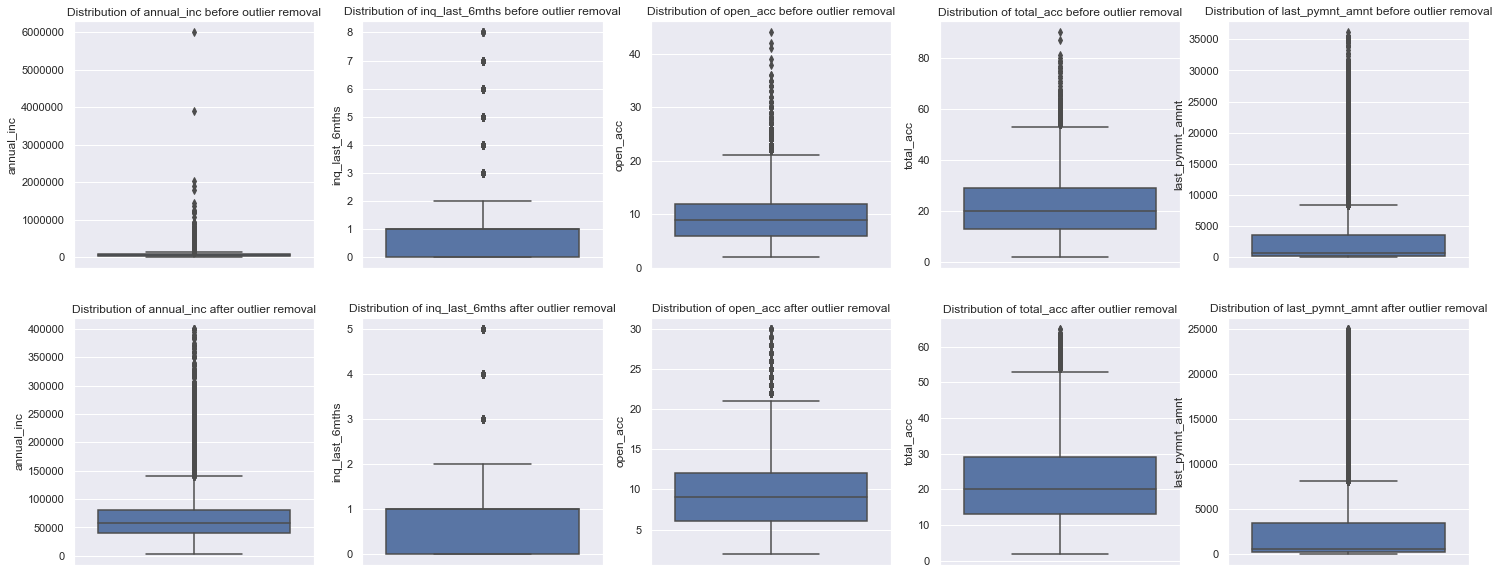

In [73]:
#data.describe()

# Code for plotting graphs before and after handling outliers
#Conditions: annual_inc >400000, inq_last_6mths >5, open_acc >30, total_acc >65, revol_bal >110000, total_rec_int >15000, last_pymnt_amnt >25000
fig, axis = plt.subplots(2,5,figsize=(25, 10))
sns.boxplot(y = temp_annual_inc,ax=axis[0,0]).set(title="Distribution of annual_inc before outlier removal")
sns.boxplot(y = temp_inq_last_6mths,ax=axis[0,1]).set(title="Distribution of inq_last_6mths before outlier removal")
sns.boxplot(y = temp_open_acc,ax=axis[0,2]).set(title="Distribution of open_acc before outlier removal")
sns.boxplot(y = temp_total_acc,ax=axis[0,3]).set(title="Distribution of total_acc before outlier removal")
sns.boxplot(y = temp_last_pymnt_amnt,ax=axis[0,4]).set(title="Distribution of last_pymnt_amnt before outlier removal")

# Code for removing the outliers
data = data[-(data['annual_inc']>400000)]
data = data[-(data['inq_last_6mths']>5)]
data = data[-(data['open_acc']>30)]
data = data[-(data['total_acc']>65)]
data = data[-(data['revol_bal']>110000)]
data = data[-(data['total_rec_int']>15000)]
data = data[-(data['last_pymnt_amnt']>25000)]

sns.boxplot(y = data['annual_inc'],ax=axis[1,0]).set(title="Distribution of annual_inc after outlier removal")
sns.boxplot(y = data['inq_last_6mths'],ax=axis[1,1]).set(title="Distribution of inq_last_6mths after outlier removal")
sns.boxplot(y = data['open_acc'],ax=axis[1,2]).set(title="Distribution of open_acc after outlier removal")
sns.boxplot(y = data['total_acc'],ax=axis[1,3]).set(title="Distribution of total_acc after outlier removal")
sns.boxplot(y = data['last_pymnt_amnt'],ax=axis[1,4]).set(title="Distribution of last_pymnt_amnt after outlier removal")

plt.show()
# sns.boxplot(y = data['annual_inc'])
# len(data[data['annual_inc']>400000])

### Transforming the date fields into DateTime format
There are around 4 date columns which are of type objects: **issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d**. These columns need to be transformed to DateTime format so that we can get the best results from these columns

In [75]:
# Create a temporary dataframe for display purpose
temp_dataset_before = data[["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]].head().copy()
display(temp_dataset_before)

# Transforming "issue_d", "earliest_cr_line", "last_pymnt_d" and "last_credit_pull_d" columns to Datetime format
data["issue_d"] = pd.to_datetime(data["issue_d"],format="%b-%y")
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"],format="%b-%y")
data["last_pymnt_d"] = pd.to_datetime(data["last_pymnt_d"],format="%b-%y")
data["last_credit_pull_d"] = pd.to_datetime(data["last_credit_pull_d"],format="%b-%y")

temp_dataset_after = data[["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]].head()
display(temp_dataset_after)

### Transforming the potential numeric columns from their current object type format
There are around 4 columns which are of type Object, but they can be converted to either Integer or Float. These columns are **term, int_rate, emp_length,revol_util**. 
- *term* column is converted to ordered categorical integer column
- *int_rate* is converted to continuous float column
- *emp_length* is converted to ordered categorical integer column
- *revol_util* is converted to continuous float column


In [76]:
# Create a temporary dataframe for display purpose
temp_dataset_before = data[["term","int_rate","revol_util","emp_length"]].head().copy()
display(temp_dataset_before)

# Function for emp_length column, convert 10+ years to 10, "< 1 year" to 0 and "n/a" to 0 for representation purpose
def emp_length_value_convert(x):
    if x == "10+ years":
        return 10
    elif x == "< 1 year":
        return 0
    elif x == "n/a":
        return 0
    else:
        #print(x)
        return int(x.split()[0])

# For transforming "term", "int_rate", "revol_util" and "emp_length" columns into numeric columns
data["term"] = data["term"].apply(lambda x: int(x.split()[0]))
data["int_rate"]  = data["int_rate"].apply(lambda x: float(x.split("%")[0]))
data["revol_util"] = data["revol_util"].apply(lambda x: float(x.split("%")[0]))
data["emp_length"] = data["emp_length"].apply(lambda x: emp_length_value_convert(x))

temp_dataset_after = data[["term","int_rate","revol_util","emp_length"]].head()
display(temp_dataset_after)

,term,int_rate,revol_util,emp_length
0,36 months,10.65%,83.70%,10+ years
1,60 months,15.27%,9.40%,< 1 year
2,36 months,15.96%,98.50%,10+ years
3,36 months,13.49%,21%,10+ years
5,36 months,7.90%,28.30%,3 years


,term,int_rate,revol_util,emp_length
0,36,10.65,83.7,10
1,60,15.27,9.4,0
2,36,15.96,98.5,10
3,36,13.49,21.0,10
5,36,7.90,28.3,3


### Transforming the object column into a ordered categorical numeric column
I see that the column **grade and sub-grade** can be transformed from plain objects types to more meaningful ordered categorical numeric types. 
- Grade column has 5 categories: A, B, C, D and E. This can be transformed to numeric value starting from 1 up until 5
- Sub-Grade column further categorizes Grade column into 5 sub-categories i.e A grade is further split into A1, A2, A3, A4 and A5. We can assign integer number starting from 1 to A1 till 35 for F5.

In [79]:
# Create a temporary dataframe for display purpose
temp_dataset_before = data[["grade","sub_grade"]].head().copy()
display(temp_dataset_before)

# Converting the Grade and Sub-grade columns to ordered categorical numeric columns
grade_list = sorted(data["grade"].value_counts().keys())
grade_dict = {n:i+1 for i,n in enumerate(grade_list)}
sub_grade_list = sorted(data["sub_grade"].value_counts().keys())
sub_grade_dict = {n:i+1 for i,n in enumerate(sub_grade_list)}
data["grade"] = data["grade"].apply(lambda x: grade_dict[x])
data["sub_grade"] = data["sub_grade"].apply(lambda x: sub_grade_dict[x])

temp_dataset_after = data[["grade","sub_grade"]].head()
display(temp_dataset_after)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
5,A,A4


,grade,sub_grade
0,2,7
1,3,14
2,3,15
3,3,11
5,1,4


### Handling the inconsistent data
For the column **earliest_cr_line**, its found that the years go well beyond into the future i.e it has values beyond 2045 up until 2068. This doesnt make sense and must be a data entry issue. Hence we will remove all the records which has value beyond 2020. We may not be able to impute the values with any other values as it might distort the actual distribution. Also, the number of records which has value beyond 2020 is just 83, which is **not even 0.25% of the actual data**. Hence, **will delete records whose earliest_cr_line is more than *01-01-2020*.**

In [82]:
# Deleting records whose earliest_cr_line is more than 01-01-2020
data = data[-(data["earliest_cr_line"]>'01-01-2020')]

### Derived columns: Extracting the Month and the Year data from the DateTime columns
Brief data analysis on the DateTime columns revealed that there are interesting patterns around certain month of the year or during a certain year. To extract this information, it would be important to have the month and the year value extracted from these columns
There are 4 Datetime columns and hence we will derive 8 columns from these 4 columns: one for month and the other one for year
- We will derive **earliest_cr_line_month** and **earliest_cr_line_year** columns from **earliest_cr_line** column
- We will derive **issue_d_month** and **issue_d_year** columns from **issue_d** column
- We will derive **last_pymnt_d_month** and **last_pymnt_d_year** columns from **last_pymnt_d** column
- We will derive **last_credit_pull_d_month** and **last_credit_pull_d_year** columns from **last_credit_pull_d** column


In [83]:
# Deriving the Month and the year column for earliest_cr_line
data['earliest_cr_line_month']= data["earliest_cr_line"].apply(lambda x: x.month )
data['earliest_cr_line_year'] = data["earliest_cr_line"].apply(lambda x: x.year )

# Deriving the Month and the year column for issue_d
data['issue_d_month']= data["issue_d"].apply(lambda x: x.month )
data['issue_d_year'] = data["issue_d"].apply(lambda x: x.year )

# Deriving the Month and the year column for last_pymnt_d
data['last_pymnt_d_month']= data["last_pymnt_d"].apply(lambda x: x.month )
data['last_pymnt_d_year'] = data["last_pymnt_d"].apply(lambda x: x.year )

# Deriving the Month and the year column for last_credit_pull_d
data['last_credit_pull_d_month']= data["last_credit_pull_d"].apply(lambda x: x.month )
data['last_credit_pull_d_year'] = data["last_credit_pull_d"].apply(lambda x: x.year )

### Miscellanious data wrangling activities
Some of the other miscellanious data cleaning activities are as mentioned below:
- For "home_ownership" column, we will remove "OTHER" and "NONE" value
- Remove values for "addr_state" column where the count is less than 80
- id and member_id columns can be removed as they are not relevent for the analysis
- Delete the columns **url, desc, title,zip_code** are they are not relevent for our analysis

In [84]:
# For "home_ownership" column, we will remove "OTHER" and "NONE" value
data = data[-((data["home_ownership"] == "OTHER") | (data["home_ownership"] == "NONE"))]

# Remove values for "addr_state" column where the count is less than 80
addr_state_list = data["addr_state"].value_counts().keys()[data["addr_state"].value_counts() > 80]
data = data[data["addr_state"].isin(addr_state_list)]

# id and member_id columns can be removed as they are not relevent for the analysis
data = data.loc[:,~data.columns.isin(["id", "member_id"])]

# Remove url, decription, title and zip code
data = data.loc[:,~data.columns.isin(["url", "desc", "title","zip_code"])]


## Data Cleaning Summary
As part of the data cleaning, we have handled the below activities:
- Removed Columns which had completely NULL values.
- Removed columns which had more than 30% of the NULL values
- Imputation of values which had more than 2% and less than 30%
- Deletion of records which have less than 0.5% of its total records as NA
- Handled the duplicate values
- Handled the higly skewed data columns
- Visualized and handled the outlier data in certain columns
- Tranformed the Date fields into Datetime format
- Converted the Numeric columns from the exiting Object types
- Transformed the object column into a ordered categorical numeric column
- Handled the inconsistent data
- Created derived columns from datetime columns

After performing the above activities, we have arrived at a dataset which has **38** columns and **37138** records. 

In [87]:
# We will take a backup of this data by copying it into a new variable data_new
data_new = data.copy()
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,5000,5000,4975.0,36,10.65,162.87,2,7,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,2015-01-01,171.62,2016-05-01,1,1985,12,2011,1,2015,5,2016
1,2500,2500,2500.0,60,15.27,59.83,3,14,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,2013-04-01,119.66,2013-09-01,4,1999,12,2011,4,2013,9,2013
2,2400,2400,2400.0,36,15.96,84.33,3,15,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,2014-06-01,649.91,2016-05-01,11,2001,12,2011,6,2014,5,2016
3,10000,10000,10000.0,36,13.49,339.31,3,11,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,2015-01-01,357.48,2016-04-01,2,1996,12,2011,1,2015,4,2016
5,5000,5000,5000.0,36,7.90,156.46,1,4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,2004-11-01,3,9,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,2015-01-01,161.03,2016-01-01,11,2004,12,2011,1,2015,1,2016


## Data Analysis
We will divide the data analysis into 2 phases
- **Univariate Analysis**
- **Bivariate Analysis**

*Univariate Analysis* is one wherein we will analyze columns individually, and understand the underlying pattern. We will further divide this univariate analysis into below 2 sections:
- **Categorical Univariate Analysis**
- **Continuous Univariate Analysis**

*Bivariate Analysis* is one wherein we will analyze the interaction between 2 variables and understand if there exists any relation between the 2 variables. We will further divide this univariate analysis into below 2 sections:
- **Categorical Bivariate Analysis**
- **Continuous Bivariate Analysis**

For our Bivariate analysis, we will focus more on interaction of other columns with respect to our target variable *loan_status*

### Categorical Univariate Analysis
Here we will try to explore the Categorical columns in depth and highlight any interesting pattern that we see in them with relevent graphs

#### Grade and Sub-Grade column:
For grade columns, most of the user have grade B, followed by A. The number of users decreases as grade is degraded i.e from C to F, the number of users reduces
Sub-Grade has an interesting pattern. For grade A and B, *the number of borrowers increase with decrease in sub-grade* i.e from A1 to A5 and B1 to B5. This might be because the *borrowers tend to maintain a higer grade (even though lower sub-grade) than a lower grade*. But for C, D, E and F, there are more borrowers towards the higer spectrum of the grade (C1,C2) compared to lower end(C4, C5)
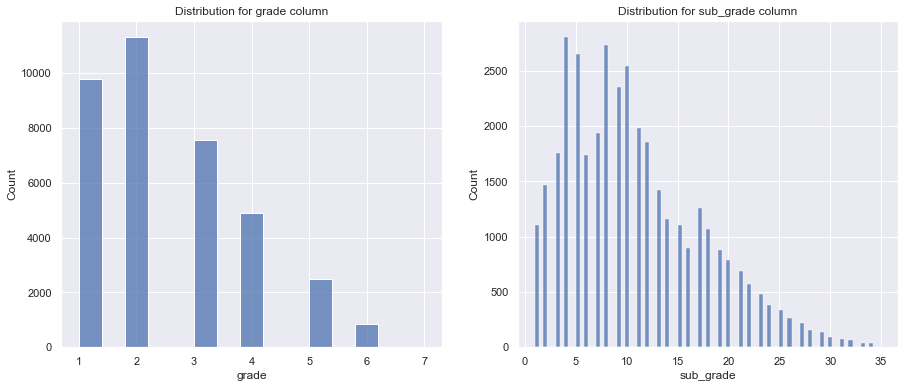

#### Employee Length and home_ownership
**emp_length**: What we observe in this trend is that the more the experience, lesser the number of users who tend to borrow. But one interesting observation is people who are less than 1 year experience tend to borrow high compared to 1-2 years. This might be because the sense of getting a job, compels many users to apply for loan, and since many would have applied for load in the initial year of getting a job, they tend to refrain for the next year i.e between 1 to 2 years. Also 10+ years experience people have higher borrowers. Though the experience is spread over a larger spectrum of experience (10+ years) it would be interesting to analyze the reason for borrowing and their default rate.

**home_ownership**: Most of the borrowers are either on rent or already have a mortgage. This shows that people who tend to borrow have some or the other prior obligations
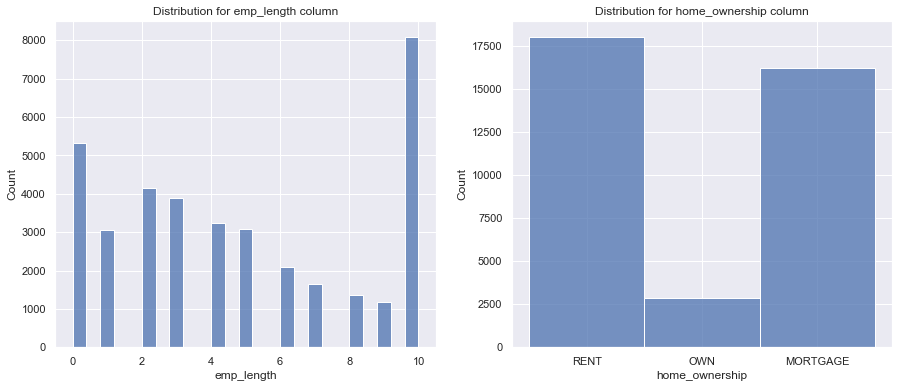


####  Issue Date and Earliest Credit Line
**issue_d**: Between March 2008 till Oct 2008, the issuance of loans decreased. This is due to the 2008 financial crisis. But start of 2009, there was an increase in disbursement of loan and it gradually increased all the way till 2012. It would be interesting to analyze, which period of loan disbursement led to the highest default.

**earliest_cr_line_month**: Its interesting to note that more numbers of borrowers have their credit line opened during the month of Oct, Nov, Dec and Jan. This is specially the time of Thanks Giving, Black Friday and Christmas (Holiday time in the US). 
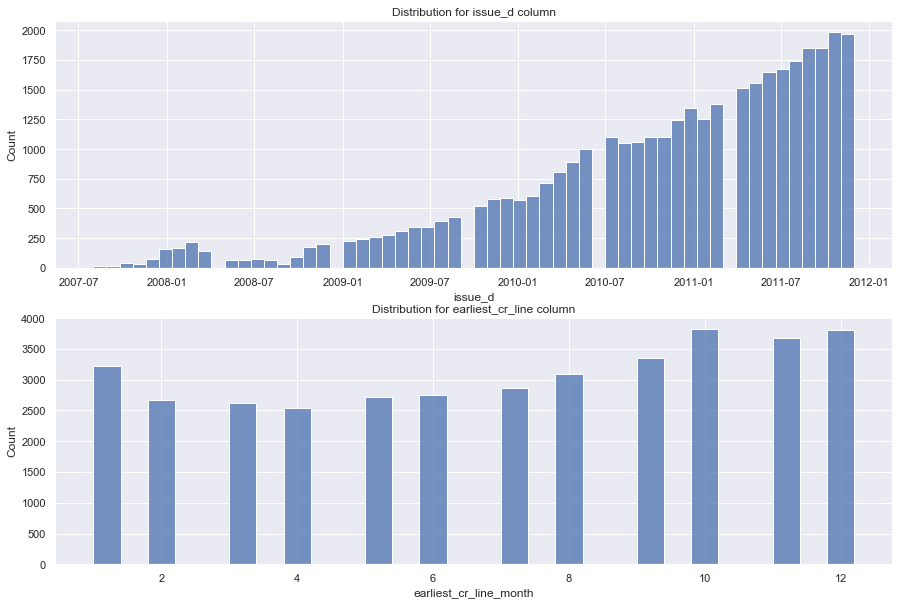


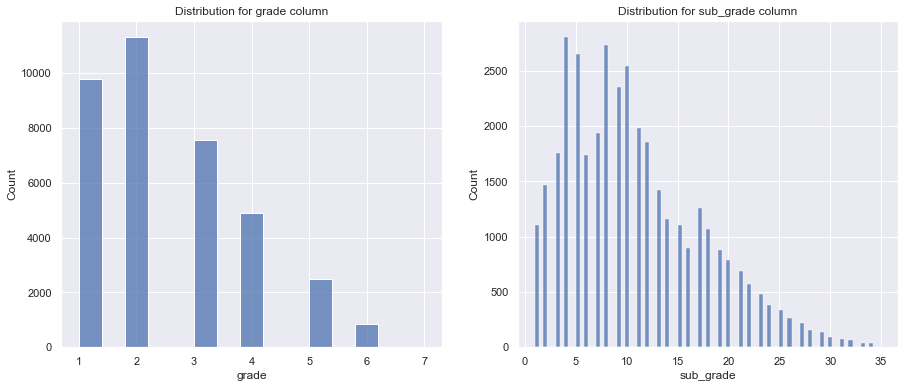

In [162]:
#data["last_credit_pull_d"].value_counts()

# Code for grade and sub-grade analysis
fig, axis = plt.subplots(1,2,figsize=(15, 6))
sns.histplot(x="grade", data=data_new, binwidth=0.40,ax=axis[0])
sns.histplot(x="sub_grade", data=data_new, binwidth=0.40,ax=axis[1])
axis[0].set(title="Distribution for grade column")
axis[1].set(title="Distribution for sub_grade column")
plt.show()


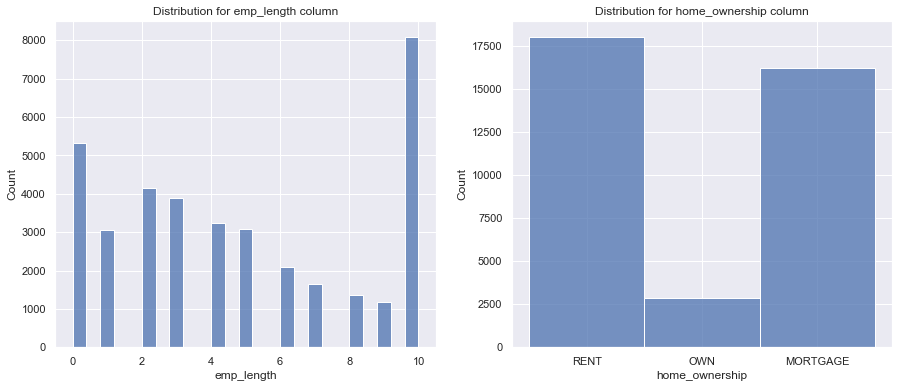

In [163]:
# Code for Employee Length, home_ownership
fig, axis = plt.subplots(1,2,figsize=(15, 6))
sns.histplot(x="emp_length", data=data_new, binwidth=0.40,ax=axis[0])
sns.histplot(x="home_ownership", data=data_new, binwidth=0.40,ax=axis[1])
axis[0].set(title="Distribution for emp_length column")
axis[1].set(title="Distribution for home_ownership column")
plt.show()


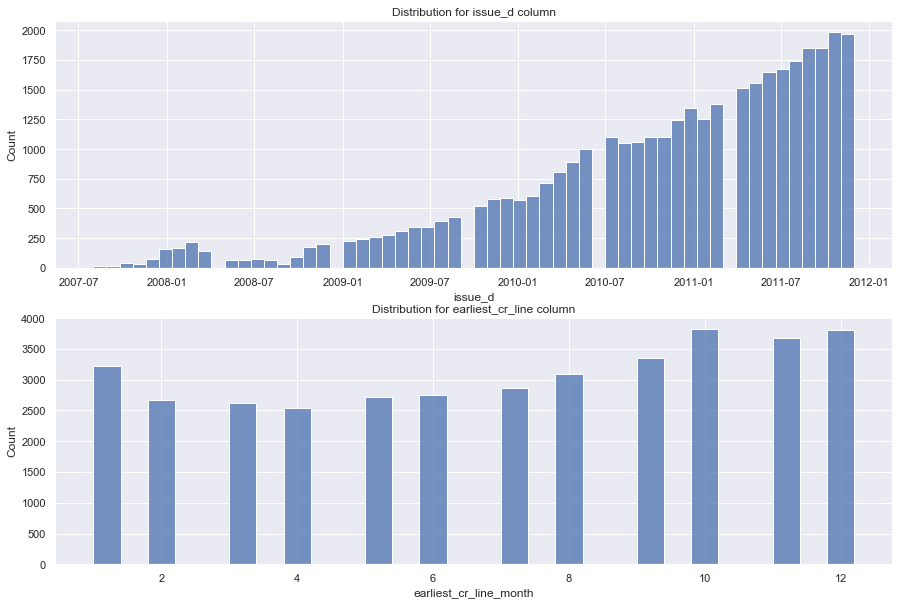

In [164]:
# Code for Issue Date and Earliest Credit Line
fig, axis = plt.subplots(2,1,figsize=(15, 10))
sns.histplot(x="issue_d", data=data_new, ax=axis[0])
sns.histplot(x="earliest_cr_line_month", data=data_new, binwidth=0.40,ax=axis[1])
axis[0].set(title="Distribution for issue_d column")
axis[1].set(title="Distribution for earliest_cr_line column")
plt.show()

### Continuous Univariate Analysis
Here we will try to explore the Continuous columns in depth and highlight any interesting pattern that we see in them with relevent graphs

#### Loan_amnt and Int_rate
**loan_amnt**: Its interesting to find that the values are more concentrated around the multiples of 5000. Also, we can see prominent spikes around multiple of 1000. One of the reason for this might be the fact that people take loan amount in multiple of 1k or 5k. While 50% of the values are concentrated between 5k and 15k mark, 99.5% of the values are between 100 and 30k.

**int_rate**: 50% of the values are between 9% and 14%. A good number of values are centered around 7.5% (Close to 12% of values)

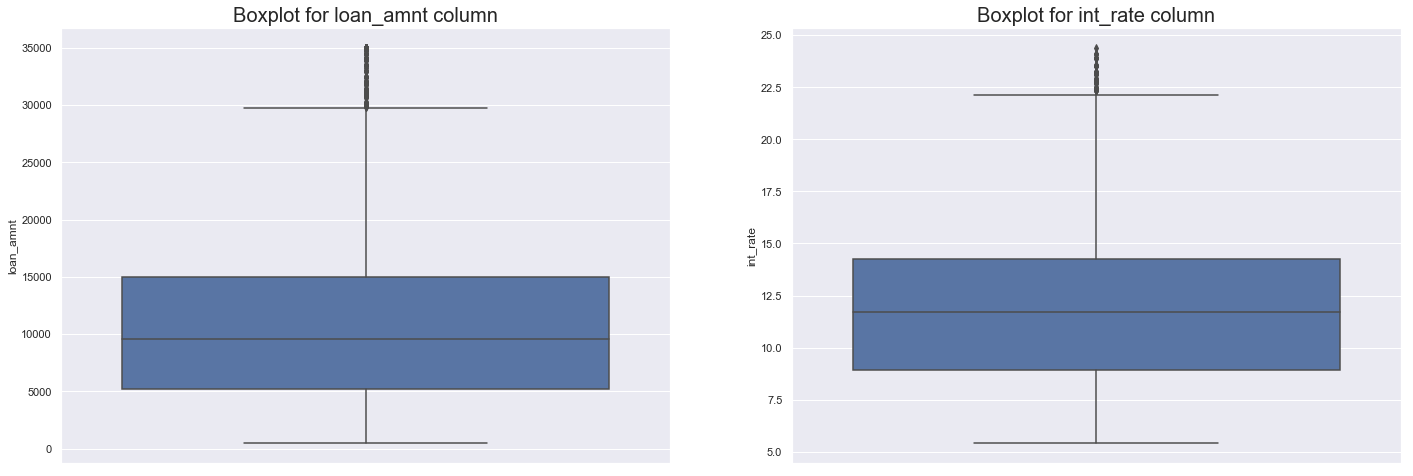

#### Installment and Total Received Interest
**installment**: 50% of the values are between 180 and 420 and 99% of value are between 50 and 820. From 200, the number of borowers owing the installments decreases as the installments increases. This tends to show that most of the installments are of smaller amounts

**total_rec_int**: total_rec_int has an interesting smooth pattern. Seems like the lesser borrowers pay more interest and the number of users decreases as the interest increases. 
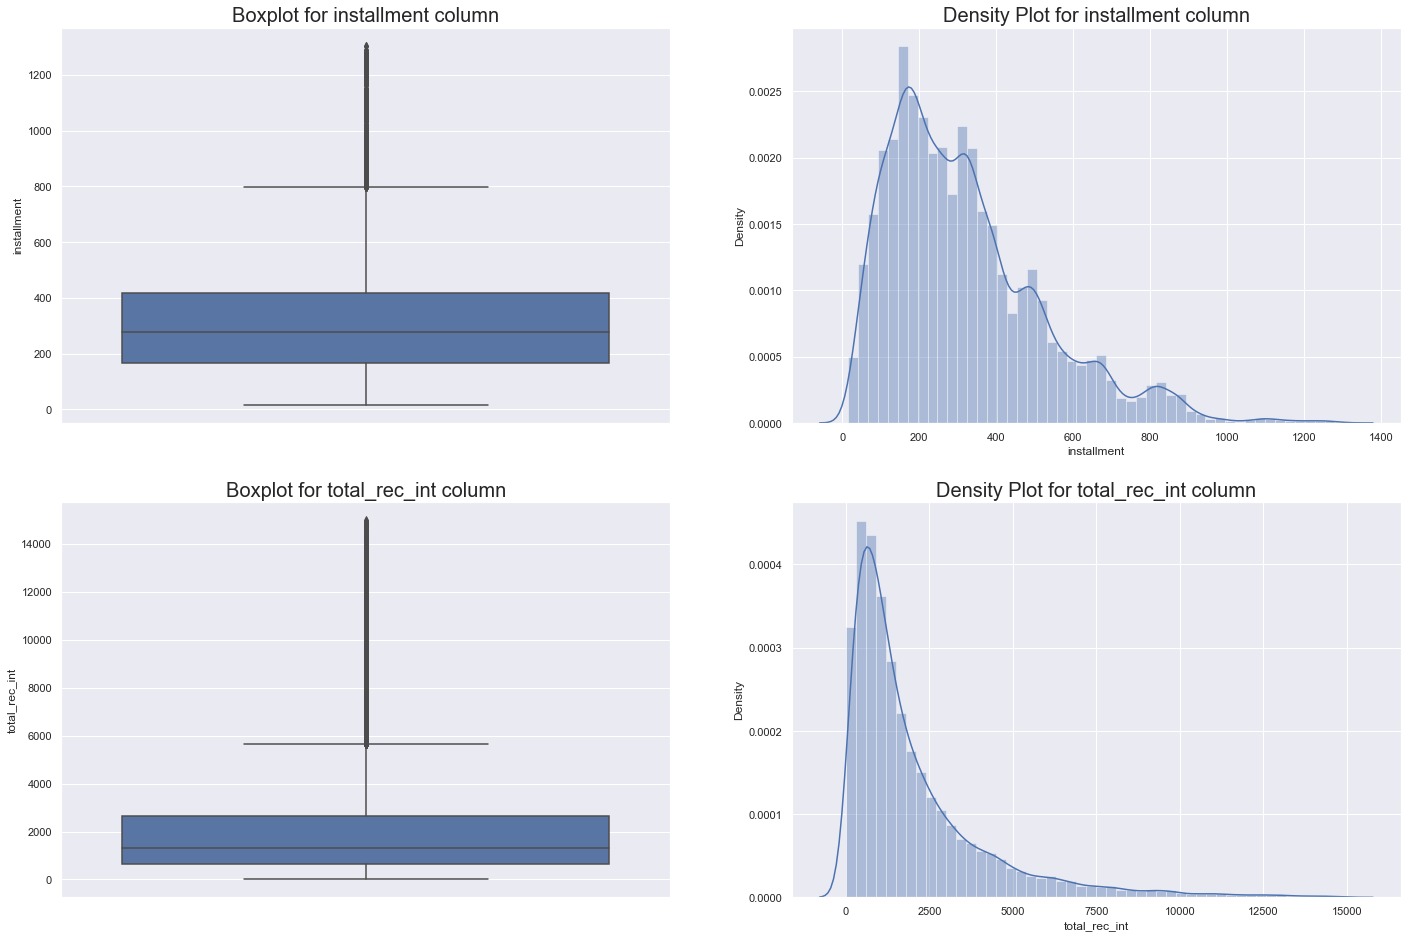



[]

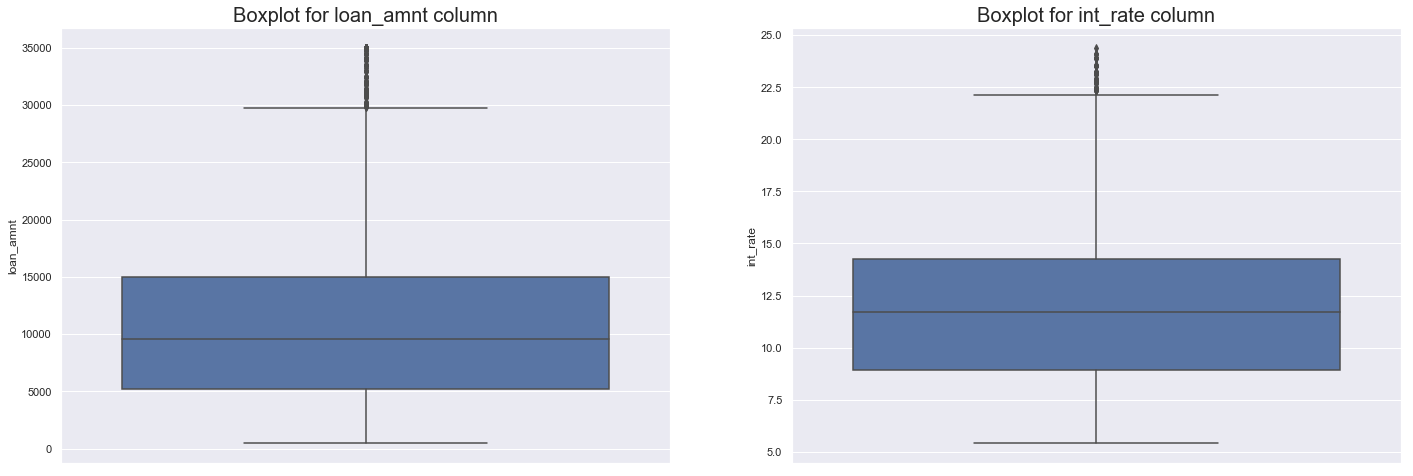

In [160]:
# Plot for loan_amnt and int_rate
fig, axis = plt.subplots(1,2,figsize=(24, 8))
sns.boxplot(y="loan_amnt",data=data_new,ax=axis[0])
sns.boxplot(y="int_rate",data=data_new,ax=axis[1])
axis[0].set_title("Boxplot for loan_amnt column",fontsize='20')
axis[1].set_title("Boxplot for int_rate column",fontsize='20')
plt.plot()


[]

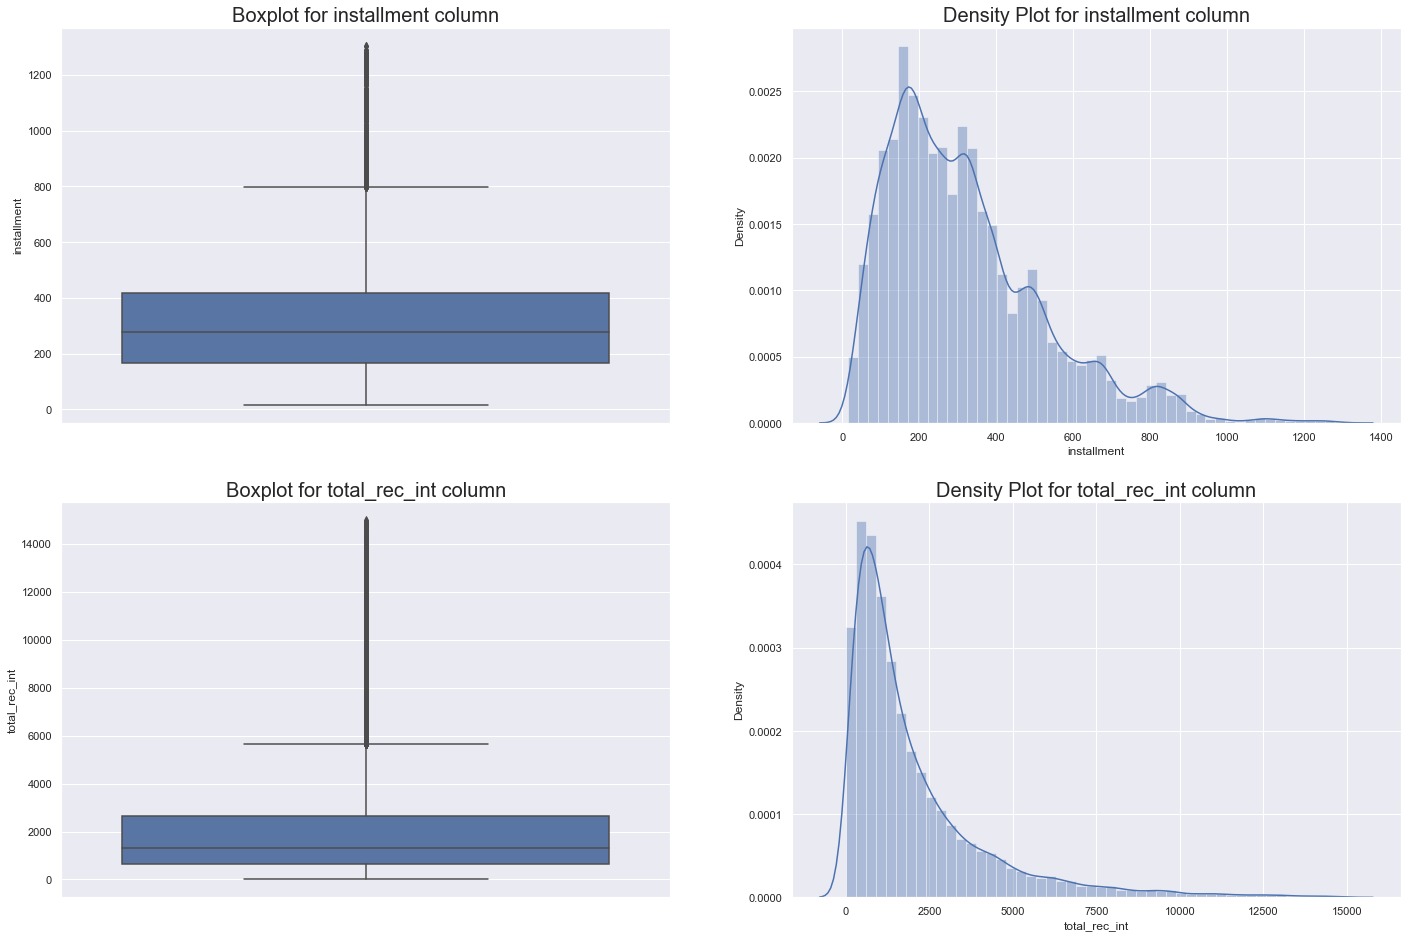

In [161]:
# Plot for installment and total_rec_int
fig, axis = plt.subplots(2,2,figsize=(24, 16))
sns.boxplot(y="installment",data=data_new,ax=axis[0,0])
sns.distplot(data_new["installment"],ax=axis[0,1])
sns.boxplot(y="total_rec_int",data=data_new,ax=axis[1,0])
sns.distplot(data_new["total_rec_int"],ax=axis[1,1])
axis[0,0].set_title("Boxplot for installment column",fontsize='20')
axis[0,1].set_title("Density Plot for installment column",fontsize='20')
axis[1,0].set_title("Boxplot for total_rec_int column",fontsize='20')
axis[1,1].set_title("Density Plot for total_rec_int column",fontsize='20')
plt.plot()

### Summary of the univariate analysis
Below are the list of findings extracted from the univariate analysis:
- Most of the borrowers tend to maintain a higher grade (i.e  A, B). 
- Amongst the sub-grade, borrowers tend to maintain higher grade, be it at the lower sub grade i.e borrowers tend to keep themselves at A5 rather than B1. But for lower grade this trend changes and borrowers tend to keep higher sub-grade i.e D1 or F1 rather than D5 or F5
- Its observed that as the length of the employment increases, the number of people opting for loans also decreases. One intersting pattern fished from univariate analysis of *emp_length* column was that freshers or new joinees tend to take too much of loan compared to all other experience bins. 
- Its observed that people who are either in rented house or have an existing mortgage tend to take more loans than people who own a house
- Potential borrowers tend to open their credit line during or slightly before or after holiday season like the month of Oct, Nov, Dec or Jan.
- Many borrowers tend to take loan in increment of 5k or 1k.
- Bulk of the borrowers tend to opt for lower installment and pay lower interest amount.

## Bivariate Analysis
Bivariate Analysis is one wherein we will analyze the interaction between 2 variables and understand if there exists any relation between the 2 variables. For our Bivariate analysis, we will focus more on interaction of other columns with respect to our target variable *loan_status*. We will further devide this univariate analysis into below 2 sections:
- Categorical Bivariate Analysis
- Continuous Bivariate Analysis

### Categorical Bivariate Analysis
We will first focus on the bivariate analysis of the categorical variables with respect to our target variable *loan_status*. The plot we will use is that of *histplot*. Here we will create 2 histplots:
- First one highlights the *Percent* of each category of *loan_status* for each segment of the analyzed categorical variable. The reason we are plotting this graph is that we the data is skewed towards *Fully Paid* category of *loan_status*. Hence just plotting a histplot of count wont yield any meaningful insights. Also,this will help us understand if the proportion of one perticular category of *loan_status* dominates over other.
- Second one displays the count of category of *loan_status* for each segment of the analyzed categorical variable.

Of all the variables analyzed, we will only share the findings of those variables which has a meaningful impact on *loan_status*

#### Loan Status vs Term
What we analyze here is that *Long term loans tend to result in higher proportion of defaulters when compared to short term loan*. One strong reason for this might be the fact that borrowers might be able to keep up with long term commitments and hence might fail to repay the full amount. 
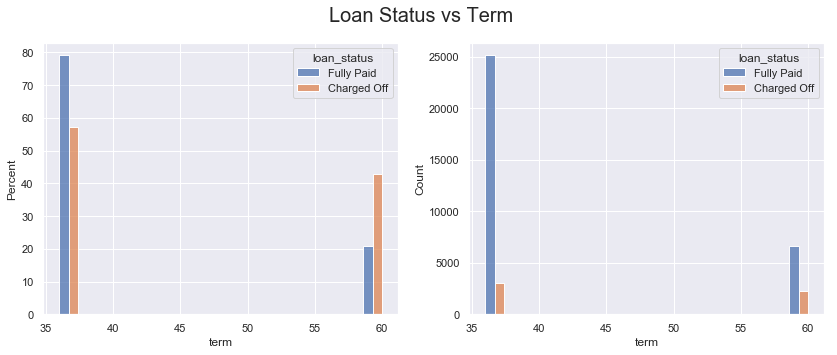

#### Loan Status vs Grade/SubGrade
As per the analysis, it seems like *potential defaulters always tend to maintain a lower grade as compared to the non-defaulters*. This is very evident in the below graph, wherein the lower grades (C, D and E) have higher proportion of defaulters as compared to the higher grades
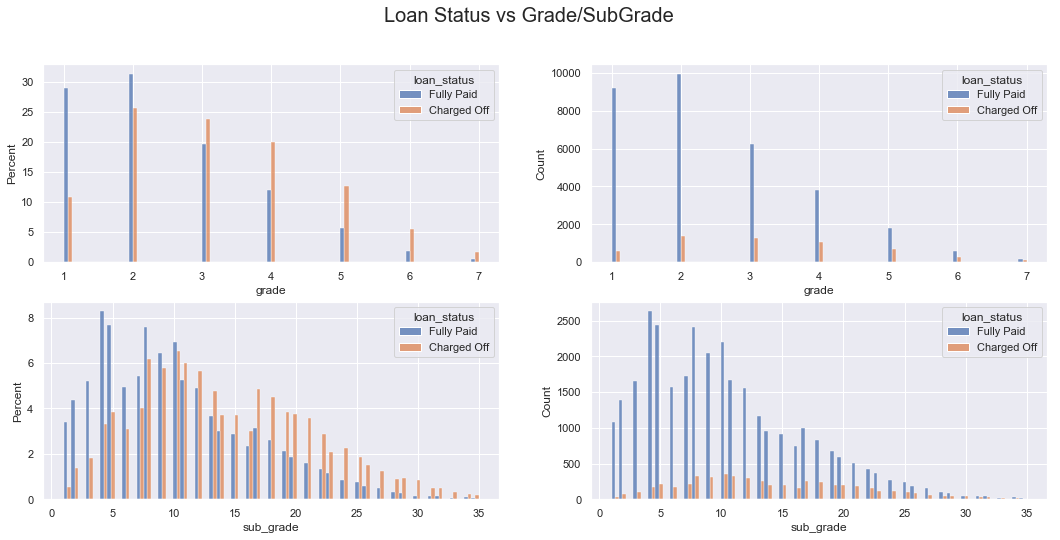

#### Loan Status vs Verification Status
A general though would be that if the income or source of income is verified, then the proportion of defaulters should be less as compared to Not verified loan applications. But as per the below graph, it seems the other way round. *The proportion of defaulters in Verified and Source verified category is more than in Not Verified*. This might highlight the fact the duue-diligence followed in verifying the income needs to be revisited by the company. Here, the difference is not very high, and hence we cannot establish with certainity that there is a issue in the verification process, but surely the process can be reviewed.
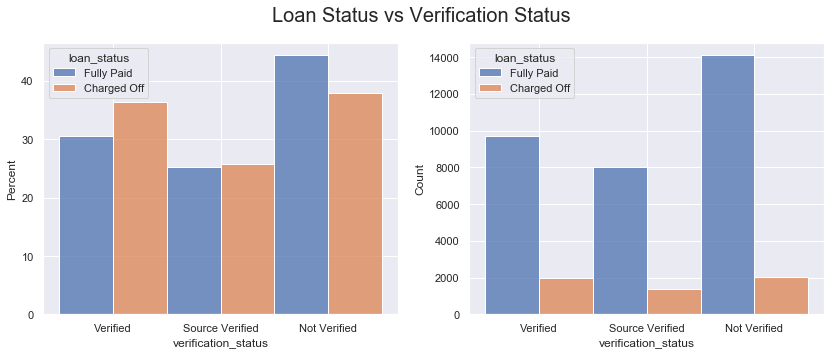

#### Loan Status vs Inquiries in last 6 months
Its observed that borrowers who defaulted inquired more number of times as compared to the Fully Paid borrowers. Hence keeping a track on the number of inquiries can be handy.
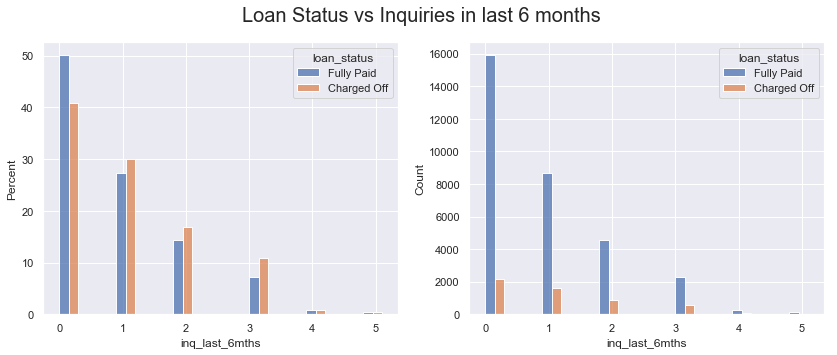

#### Loan Status vs  Last Payment Year
From the below graph its observed that defaulters tend to stop paying early as compared to the Fully Paid borrowers. Though this is not the factor which is leading to default, but tracking the last payment date and following up effectively might reduce the number of defaults.
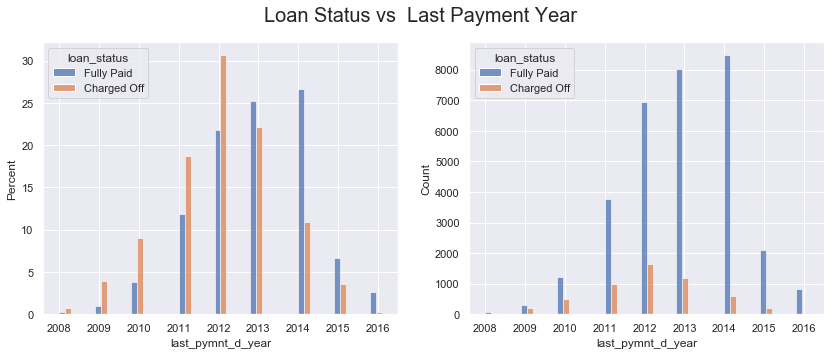

[]

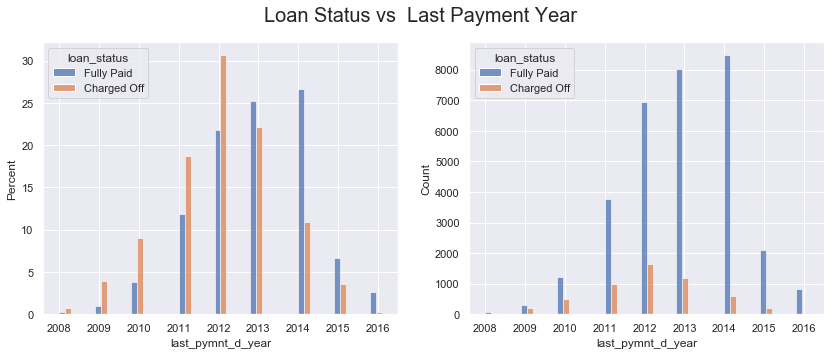

In [136]:
# Plot for loan_status vs term
fig, axis = plt.subplots(1,2,figsize=(14, 5))
sns.histplot(x="term",hue="loan_status", data=data_new,stat="percent",multiple="dodge",ax=axis[0],common_norm=False)
sns.histplot(x="term",hue="loan_status", data=data_new,multiple="dodge",ax=axis[1])
fig.suptitle("Loan Status vs Term",fontsize=20)
plt.plot()

[]

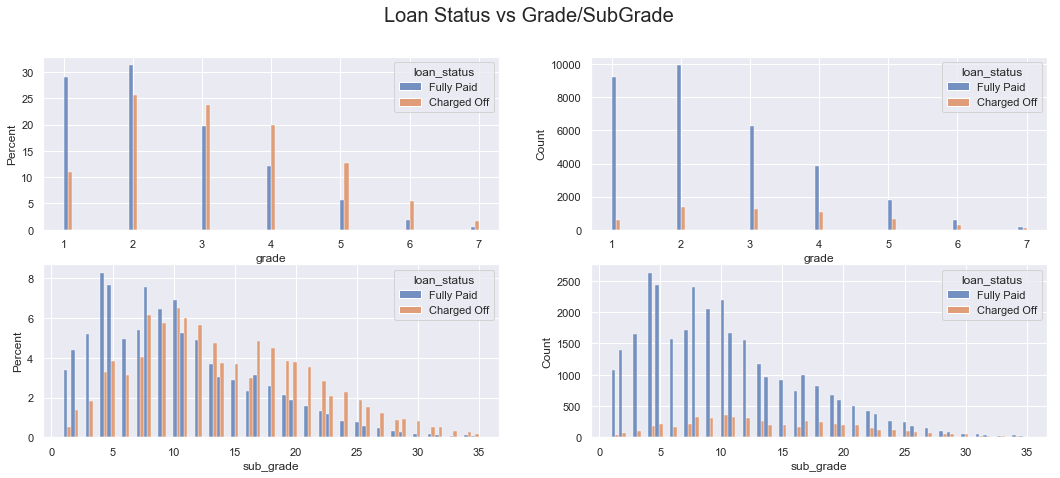

In [156]:
# Plot for loan_status vs term
fig, axis = plt.subplots(2,2,figsize=(18, 7))
sns.histplot(x="grade",hue="loan_status", data=data_new,stat="percent",multiple="dodge",ax=axis[0,0],common_norm=False)
sns.histplot(x="grade",hue="loan_status", data=data_new,multiple="dodge",ax=axis[0,1])
sns.histplot(x="sub_grade",hue="loan_status", data=data_new,stat="percent",multiple="dodge",ax=axis[1,0],common_norm=False)
sns.histplot(x="sub_grade",hue="loan_status", data=data_new,multiple="dodge",ax=axis[1,1])
fig.suptitle("Loan Status vs Grade/SubGrade",fontsize=20)
plt.plot()

[]

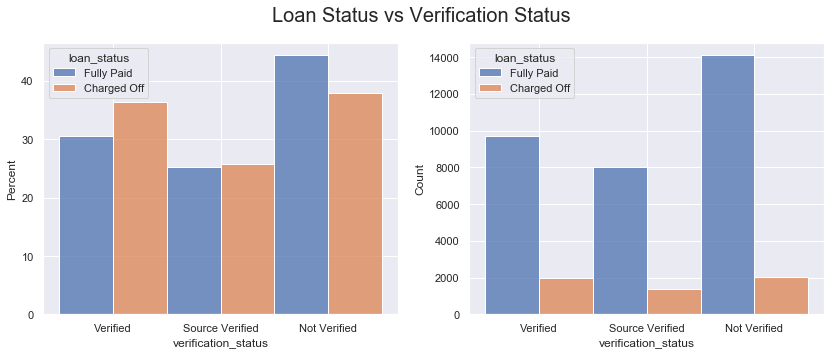

In [157]:
# Plot for Loan Status vs Verification Status
fig, axis = plt.subplots(1,2,figsize=(14, 5))
sns.histplot(x="verification_status",hue="loan_status", data=data_new,stat="percent",multiple="dodge",ax=axis[0],common_norm=False)
sns.histplot(x="verification_status",hue="loan_status", data=data_new,multiple="dodge",ax=axis[1])
fig.suptitle("Loan Status vs Verification Status",fontsize=20)
plt.plot()

[]

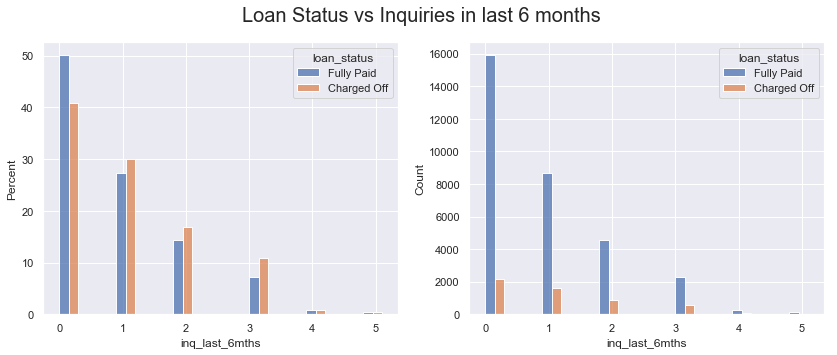

In [158]:
# Plot for Loan Status vs Inquiries in last 6 month
fig, axis = plt.subplots(1,2,figsize=(14, 5))
sns.histplot(x="inq_last_6mths",hue="loan_status",bins=10,binwidth=0.30, data=data_new,stat="percent",multiple="dodge",ax=axis[0],common_norm=False)
sns.histplot(x="inq_last_6mths",hue="loan_status", bins=10,binwidth=0.30,data=data_new,multiple="dodge",ax=axis[1])
fig.suptitle("Loan Status vs Inquiries in last 6 months",fontsize=20)
plt.plot()

[]

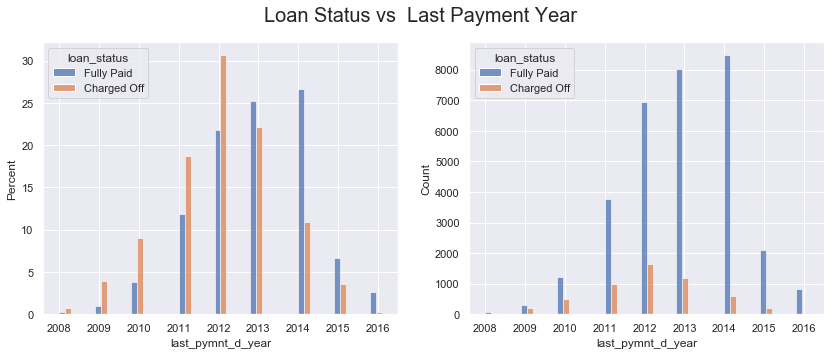

In [159]:
# Plot for Loan Status vs  Last Payment Year
fig, axis = plt.subplots(1,2,figsize=(14, 5))
sns.histplot(x="last_pymnt_d_year",hue="loan_status", bins=10, binwidth=0.30, data=data_new,stat="percent",multiple="dodge",ax=axis[0],common_norm=False)
sns.histplot(x="last_pymnt_d_year",hue="loan_status", bins=10, binwidth=0.30,data=data_new,multiple="dodge",ax=axis[1])
fig.suptitle("Loan Status vs  Last Payment Year",fontsize=20)
plt.plot()

### Continuous Bivariate Analysis
We will first focus on the bivariate analysis of the continuous variables with respect to our target variable loan_status. The plot we will use is boxplot. 


#### loan_status vs int_rate
For charged-off loans, the interest rate seems to be higher when compared to Fully Paid. To summarize, charged-off loans have 2-3 points more when compared to Fully paid. This is substantial difference in the interest rate, and borrowers might not be able to repay the loan owing to higher interest rate. This can be a *strong influencer* of the default rate

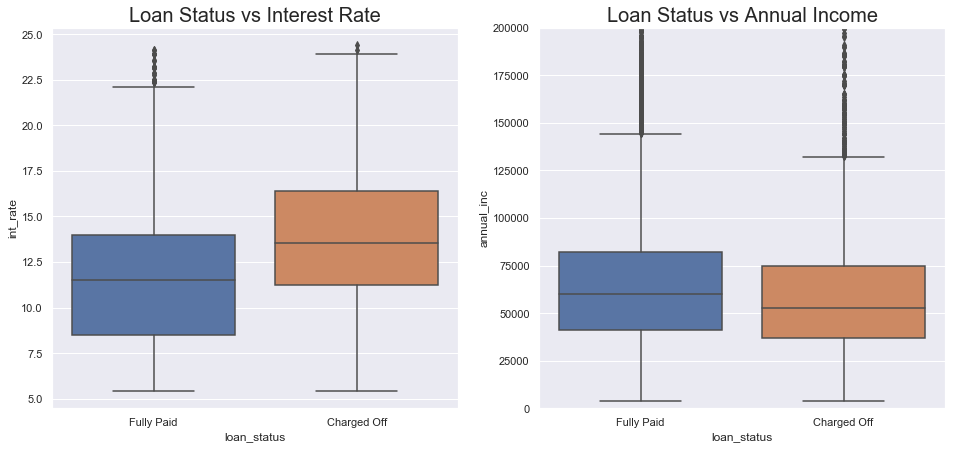

#### loan_status vs annual_inc
It can be observed that charged-off candidates have lower spread of annual income and lower mean and median as compared to the Fully Paid candidates. The difference is slightly appreciable (median value differ by 10%) and hence annaul income to a limited extent plays a role in deciding whether the candidate can default or not

#### loan_status vs revol_util
It can be observed that the revol_util for charged-off loan is significantly higher than fully-paid. While the spread is the same, more than 50% of the candidates who are charged off have 10 points more than Fully-paid candidates. This indicates that charged-off candidates tend to utilize their credit to the limit and hence result in default.This makes the column a *strong influencer* of loan status

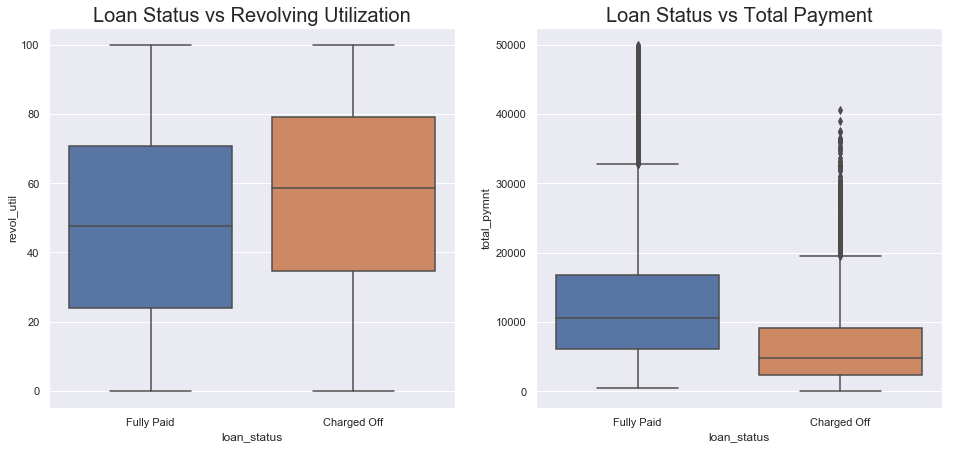

#### loan_status vs total_pymnt
It can be seen that the total_payement for charged-off is significantly lower than the loans which are fully paid. This resonates with the fact that the charged off loans usually dont pay the full amount. But what is discerning is the fact that the difference between charged-off and Fully-paid is very significant i.e there is a difference of close to 4k or 50% lower than fully paid candidates. This might not be the driving factor, but instead can be the effect of a borrower who is going to default. 

#### loan_status vs total_rec_prncp
This draws the same rational as total payemnt columns. From the box plot its evident that there is strong influence of total_rec_prncp on loan status. There is a difference of close to 10k or 60% between Charged-off and Fully paid. This might not be the driving factor, but instead can be the effect of a borrower who is going to default.

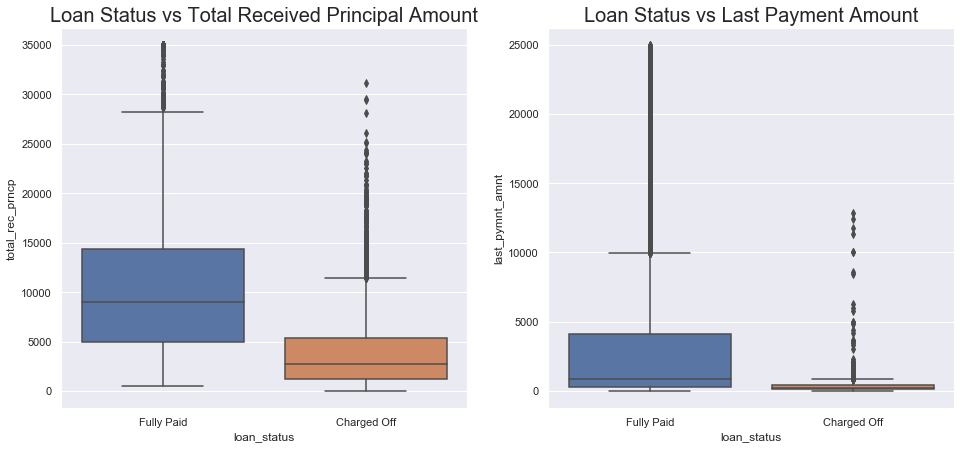

#### loan_status vs last_pymnt_amnt
It can be seem that for the charged-off loans the lat payment amount is significantly low compared to fully-paid. The difference here is 4x. One important thing to note here is more of a correlation effect. That is, last_pymnt_amnt is not essentially driving the loan status, but its the effect of a person who is about to default.


[]

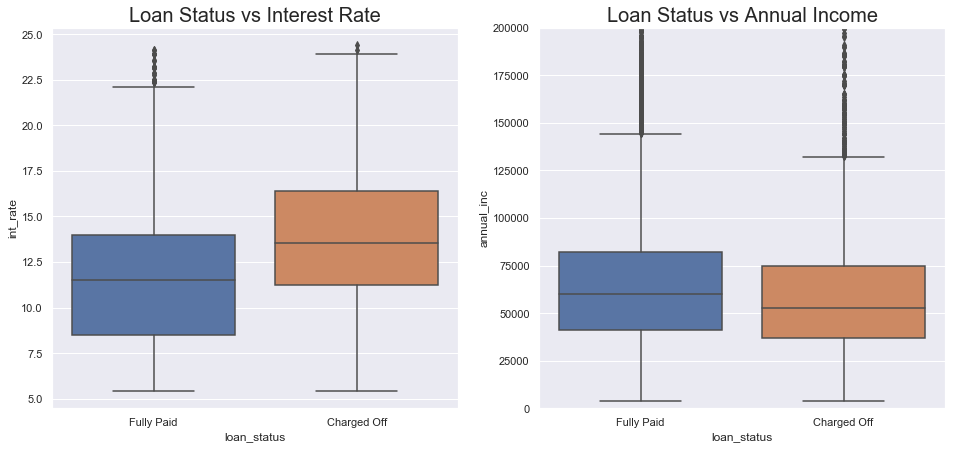

In [154]:
# Code to plot the Loan Status vs Interest Rate Amount and Loan Status vs Annual Income
fig, axis = plt.subplots(1,2,figsize=(16, 7))
sns.boxplot(x="loan_status", y="int_rate", data=data_new,ax=axis[0])
sns.boxplot(x="loan_status", y="annual_inc", data=data_new,ax=axis[1])
axis[1].set(ylim=(0,200000))
axis[0].set_title("Loan Status vs Interest Rate",fontsize='20')
axis[1].set_title("Loan Status vs Annual Income",fontsize='20')
plt.plot()


[]

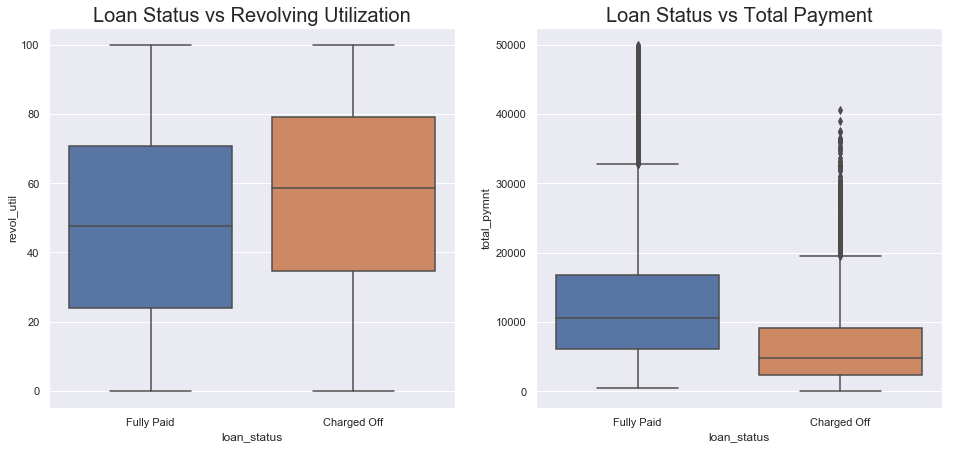

In [150]:
# Code to plot the Loan Status vs Revolving Utilization and Loan Status vs Total Payment
fig, axis = plt.subplots(1,2,figsize=(16, 7))
sns.boxplot(x="loan_status", y="revol_util", data=data_new,ax=axis[0])
sns.boxplot(x="loan_status", y="total_pymnt", data=data_new,ax=axis[1])
axis[0].set_title("Loan Status vs Revolving Utilization",fontsize='20')
axis[1].set_title("Loan Status vs Total Payment",fontsize='20')
plt.plot()

[]

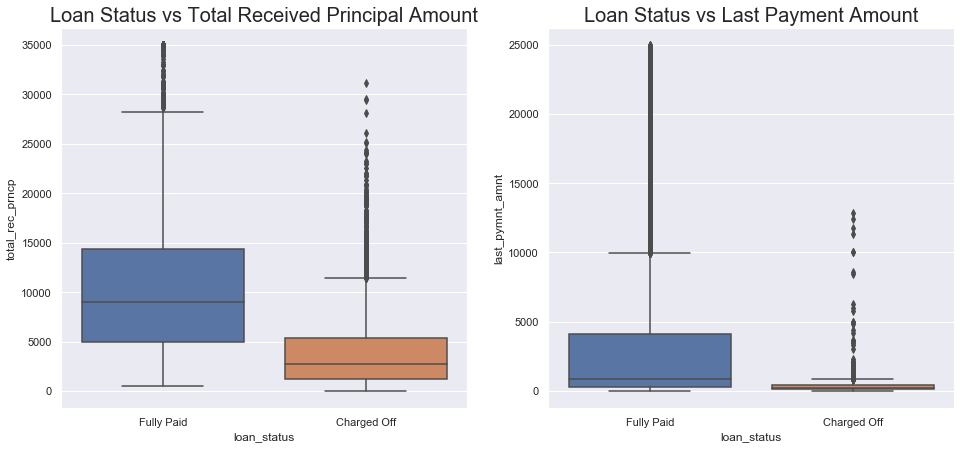

In [152]:
# Code to plot the Loan Status vs Total Received Principal Amount and Loan Status vs Last Payment Amount plot
fig, axis = plt.subplots(1,2,figsize=(16, 7))
sns.boxplot(x="loan_status", y="total_rec_prncp", data=data_new,ax=axis[0])
sns.boxplot(x="loan_status", y="last_pymnt_amnt", data=data_new,ax=axis[1])
axis[0].set_title("Loan Status vs Total Received Principal Amount",fontsize='20')
axis[1].set_title("Loan Status vs Last Payment Amount",fontsize='20')
plt.plot()

## Lending Club Case Study - EDA SUMMARY

We will split the summary of our analysis into 2 sections:
- **Findings**
- **Recommendations**

Under the *Findings* section, we will unravel all the interesting analysis that we have come across when we performed *Exploratory Data Analysis (EDA)* on the *loans.csv* dataset. 

Under the *Recommendations* section, we will interprit the findings, and make productive suggestions which can help business take accurate decision on whether they should approve a loan or reject it. 


### Findings

Below are the list of points that we have uncovered from the EDA of loans dataset. The below list covers the key parameters which would drive the possibility of loan turning default or not :
- One of the most compelling find was that the **interest rates** for the borrowers who defaulted was higher when compared to the fully paid borrowers. 
- Drawing from the first point, when the interest rate is high, the amount paid as interest is also high. Hence the *defaulters ended up paying more interest amount but less principal amount*. This was evident in the *loan_status vs total_rec_prncp* bivariate analysis.
- Its found that longer **duration of loan** resulted in higher percent of defaulters. This is congruous with the fact that longer the duration clubbed with higher interest rate, longer will be the obligations. This will lead to more borrowers to default.
- Its observed that, lower the **grades** (eg: C , D or E), higher the proportion of borrowers defaulting. This shows that the grades, to a larger extent, reflects the financial health or the loan repayment tendency of a borrower.
- Defaulters comparetivly make higher **enquiries** when compared to the non-defaulters. 
- Its observed that **revol_util** for charged-off loan is significantly higher than fully-paid. This indicates that charged-off candidates tend to utilize their credit to the limit and hence result in default.
- The **annual income** of defaulters is relatively lower than non-defaulters. 



### Recommendation
After analyzing the above findings, i have listed down a consolidated list of suggestions which would help the organization in approving good loans and rejecting the bad loans:
- The probability of a loan defaulting would drastically reduce if we **reduce the interest rates**. Its been observed that higher interest rates combined with longer loan tenure would result in higher interest amount to paid as compared to the prinicpal amount. This would eventually result in the borrower not being able to keep up with the obligation and hence defaulting.
- Extending point 1, **longer tenure period should be discouraged**, specifically for candidates who have higher interest rate or lower grade. Its observed that longer the tenure higher the probability of loan default.
- The company should **reconsider approving loan for candidates who have a lower grade** i.e C, D or E
- If the candidate, in the recent times, had **made multiple inquiries ,then such applications should be scrutinized**. 
- Loan applications from candidates who **tend to utilize their credit to the limit should be re-considered**.
- **Higher income candidates should be given preference in approving loans**, as its observed that higher income candidates tend repay their loans when compared with lower income candidates.
